#Mouafak Alsaid Hasan

##ENGR421 Homework-02

###Linear Discrimination by Regression

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definitions

In [39]:
def sigmoid(W, w0, x):
  return 1/(1 + np.exp(-(np.matmul(W,x) + w0))) 

K = 5
eta = 0.01
epsilon = 1e-3
def safelog(x):
    return(np.log(x + 1e-100))

# define the gradient functions
def gradient_W(X, y_truth, y_predicted):
  grad_values = []
  for c in range(K):
    sum = [0.0 for k in range(X.shape[1])]
    for i in range(len(X)):
      sum += -((y_truth[i][c] - y_predicted[i][c]) * y_predicted[i][c] * (1 - y_predicted[i][c])) * X[i]
    grad_values.append(sum)
   
  return np.array(grad_values)


def gradient_w0(y_truth, y_predicted):
  grad_values = []
  for c in range(K):
    sum = 0.0
    for i in range(len(y_predicted)):
      sum += -((y_truth[i][c] - y_predicted[i][c]) * y_predicted[i][c] * (1 - y_predicted[i][c]))
    grad_values.append(sum)
  return np.array(grad_values)


def predict(X, W, W0):
    y_predicted = np.array([sigmoid(wi, wi0, x) for x in X for wi, wi0 in zip(W, W0)])
    y_predicted = y_predicted.reshape((len(X), K))
    return y_predicted



##Importing the Data sets

In [40]:
#impoting the image data from hw02_data_set_images csv file.
image_data_set = np.genfromtxt("hw02_data_set_images.csv", delimiter = ",")

#impoting labels of the image data from hw02_data_set_labels csv file.
labels_data_set = np.genfromtxt("hw02_data_set_labels.csv",dtype= 'str', delimiter = ",").astype(str)

# creating arrays to seperate test and traing data sets
training_set_data, test_set_data  = [], []
training_set_labels, test_set_labels = [], []






# fill in the arrays above.
for i in range(len(image_data_set)):
  if i <25 or (i >= 39 and i < 64) or (i >= 78 and i< 103) or (i >= 117 and i< 142) or (i >= 156 and i < 181):
    training_set_data.append(image_data_set[i])
    training_set_labels.append(ord(labels_data_set[i][1]) -65)
  else:
    test_set_data.append(image_data_set[i])
    test_set_labels.append(ord(labels_data_set[i][1]) -65)

training_set_data = np.array(training_set_data)
test_set_data = np.array(test_set_data)
training_set_labels = np.array(training_set_labels)
test_set_labels = np.array(test_set_labels)

training_binary_labels = []
test_binary_labels = []

for i in test_set_labels:
  if i == 0:
    test_binary_labels.append([1,0,0,0,0])
  elif i == 1:
    test_binary_labels.append([0,1,0,0,0])
  elif i == 2:
    test_binary_labels.append([0,0,1,0,0])
  elif i == 3:
    test_binary_labels.append([0,0,0,1,0])
  elif i == 4:
    test_binary_labels.append([0,0,0,0,1])

test_binary_labels = np.array(test_binary_labels)

for i in training_set_labels:
  if i == 0:
    training_binary_labels.append([1,0,0,0,0])
  elif i == 1:
    training_binary_labels.append([0,1,0,0,0])
  elif i == 2:
    training_binary_labels.append([0,0,1,0,0])
  elif i == 3:
    training_binary_labels.append([0,0,0,1,0])
  elif i == 4:
    training_binary_labels.append([0,0,0,0,1])

training_binary_labels = np.array(training_binary_labels)



##Discrimination by Regression Algorithm

##Paramaeter Initialization

In [41]:
# randomly initalize W and w0
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (K,training_set_data.shape[1]))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = K)



##Iterative Algorithm

In [ ]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    y_predicted = predict(training_set_data, W,w0)
    objective_values = np.append(objective_values, -np.sum((training_binary_labels * safelog(y_predicted))))
    W_old = W
    w0_old = w0
    W = W -  eta * gradient_W(training_set_data, training_binary_labels, y_predicted)
    w0 = w0 - eta * gradient_w0(training_binary_labels, y_predicted)
    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
      break
    iteration = iteration + 1
   





##Convergence

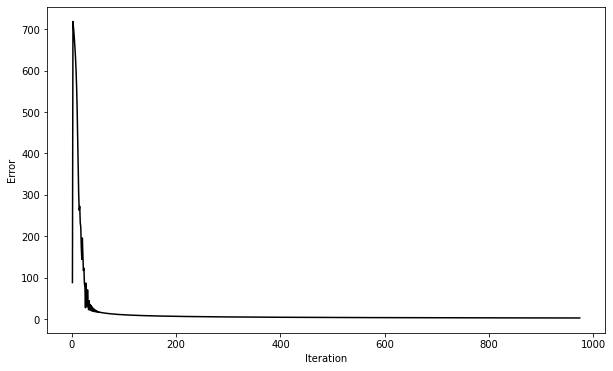

In [43]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

##Traininig Data Confusion Matrix

In [44]:
# calculate confusion matrix
training_y_pred = np.argmax(y_predicted, axis = 1)
confusion_matrix = pd.crosstab(training_y_pred, training_set_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   0   1   2   3   4
y_pred                     
0        25   0   0   0   0
1         0  25   0   0   0
2         0   0  25   0   0
3         0   0   0  25   0
4         0   0   0   0  25


##Test Data Confusion Matrix

In [45]:
# calculate confusion matrix
test_y_pred = np.argmax(predict(test_set_data, W,w0), axis = 1)
confusion_matrix = pd.crosstab(test_y_pred, test_set_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   0   1   2   3   4
y_pred                     
0        13   1   0   0   0
1         1  11   0   0   2
2         0   0  14   0   0
3         0   0   0  14   0
4         0   2   0   0  12
